# Description

For a bank to decide whether to issue a credit card to an applicant or not, credit card scores can be used as risk control method. Credit card scores are often used in financial industry as can help predict the probability of future defaults and credit card borrowings.

This dataset, therefore, objectifies and quantifies the magnitude of risk by referring to an applicant's personal information and predicting if the client is 'good' or 'bad' from different definitions.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
app = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

In [32]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [33]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [34]:
app['ID'].nunique()

438510

In [35]:
credit['ID'].nunique()

45985

In [36]:
# IDs common in both credit record and application 
len(set(credit['ID']).intersection(set(app['ID'])))

36457

Clearly, there has been repetition in Ids in the data, thus, we'll have to drop the duplicates.

<AxesSubplot:>

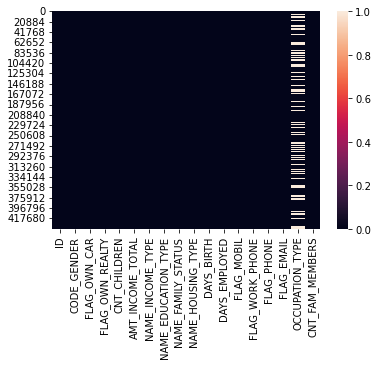

In [37]:
sns.heatmap(app.isnull())


<AxesSubplot:>

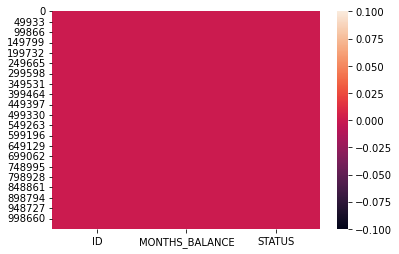

In [38]:
sns.heatmap(credit.isnull())

In [39]:
# Because Occupation type has many null values, we'll drop this column
app.drop('OCCUPATION_TYPE', axis = 1, inplace = True)

In [40]:
# Tackling duplicates in the application dataset
app = app.drop_duplicates('ID', keep = 'last')

In [41]:
# Checking non - numeric columns for data analysis
ot = pd.DataFrame(app.dtypes=='object').reset_index()
ot

,index,0
0,ID,False
1,CODE_GENDER,True
2,FLAG_OWN_CAR,True
3,FLAG_OWN_REALTY,True
4,CNT_CHILDREN,False
5,AMT_INCOME_TOTAL,False
6,NAME_INCOME_TYPE,True
7,NAME_EDUCATION_TYPE,True
8,NAME_FAMILY_STATUS,True
9,NAME_HOUSING_TYPE,True


In [42]:
# Non numeric Data
objt = ot[ot[0] ==True]['index']
objt

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [43]:
# Numeric Data
num = ot[ot[0] ==False]['index']
num

0                   ID
4         CNT_CHILDREN
5     AMT_INCOME_TOTAL
10          DAYS_BIRTH
11       DAYS_EMPLOYED
12          FLAG_MOBIL
13     FLAG_WORK_PHONE
14          FLAG_PHONE
15          FLAG_EMAIL
16     CNT_FAM_MEMBERS
Name: index, dtype: object

In [44]:
# Transforming all non numeric data into numeric classifications
# Like 0,1 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in app:
    if app[x].dtypes=='object':
        app[x] = le.fit_transform(app[x])

In [45]:
app.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0


<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

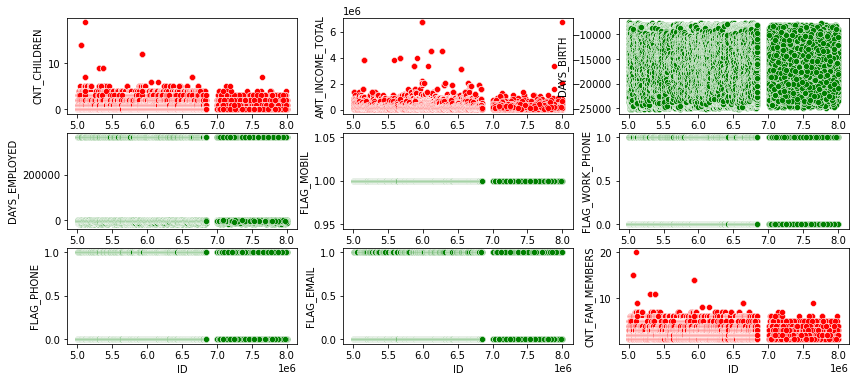

In [46]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'red')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='red')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2], color='green')
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0], color='green')
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1], color='green')
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2], color='green')
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0], color='green')
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1], color='green')
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'red')

In [47]:
# CNT_CHILDREN
hi = app['CNT_CHILDREN'].quantile(.999)
low = app['CNT_CHILDREN'].quantile(.001)
app = app[(app['CNT_CHILDREN']>low) & (app['CNT_CHILDREN']<hi)]

In [48]:
# AMT_INCOME_TOTAL
hi = app['AMT_INCOME_TOTAL'].quantile(.999)
low = app['AMT_INCOME_TOTAL'].quantile(.001)
app = app[(app['AMT_INCOME_TOTAL']>low) & (app['AMT_INCOME_TOTAL']<hi)]

In [49]:
#CNT_FAM_MEMBERS
hi = app['CNT_FAM_MEMBERS'].quantile(.999)
low = app['CNT_FAM_MEMBERS'].quantile(.001)
app = app[(app['CNT_FAM_MEMBERS']>low) & (app['CNT_FAM_MEMBERS']<hi)]

<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

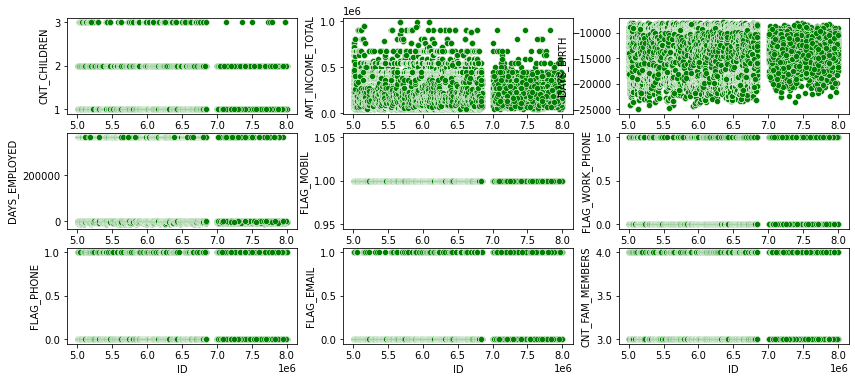

In [50]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'green')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='green')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2], color='green')
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0], color='green')
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1], color='green')
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2], color='green')
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0], color='green')
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1], color='green')
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'green')

In [51]:
credit['Months from today'] = credit['MONTHS_BALANCE']*(-1)
credit = credit.sort_values(['ID', 'Months from today'], ascending = True)
credit.head(10)

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
5,5001712,-1,C,1
6,5001712,-2,C,2
7,5001712,-3,C,3
8,5001712,-4,C,4
9,5001712,-5,C,5


In [52]:
# Since C and X are the same type, we can replace all the C with X
credit['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
credit['STATUS'] = credit['STATUS'].astype('int')
credit['STATUS'] = credit['STATUS'].apply(lambda x:1 if x >= 2 else 0)

In [53]:
credit['STATUS'].value_counts(normalize = True)

0    0.99704
1    0.00296
Name: STATUS, dtype: float64

We see that 99.7% of the data is Os, meaning, the data is oversampled

In [54]:
creditg = credit.groupby('ID').agg(max).reset_index()
creditg.head()

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59


In [55]:
df = app.join(creditg.set_index('ID'), on = 'ID', how = 'inner')
df.drop(['Months from today', 'MONTHS_BALANCE'], axis =1, inplace=True)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434779,5142964,1,0,0,1,180000.0,4,4,1,1,-10656,-926,1,1,1,0,3.0,1
434780,5142972,1,0,0,1,180000.0,4,4,3,1,-10656,-926,1,1,1,0,3.0,1
434782,5143342,1,0,0,1,216000.0,4,4,1,2,-12946,-2418,1,0,0,1,3.0,1
434791,5145846,0,0,1,1,256500.0,2,1,1,1,-17594,-1315,1,0,1,0,3.0,1


<AxesSubplot:>

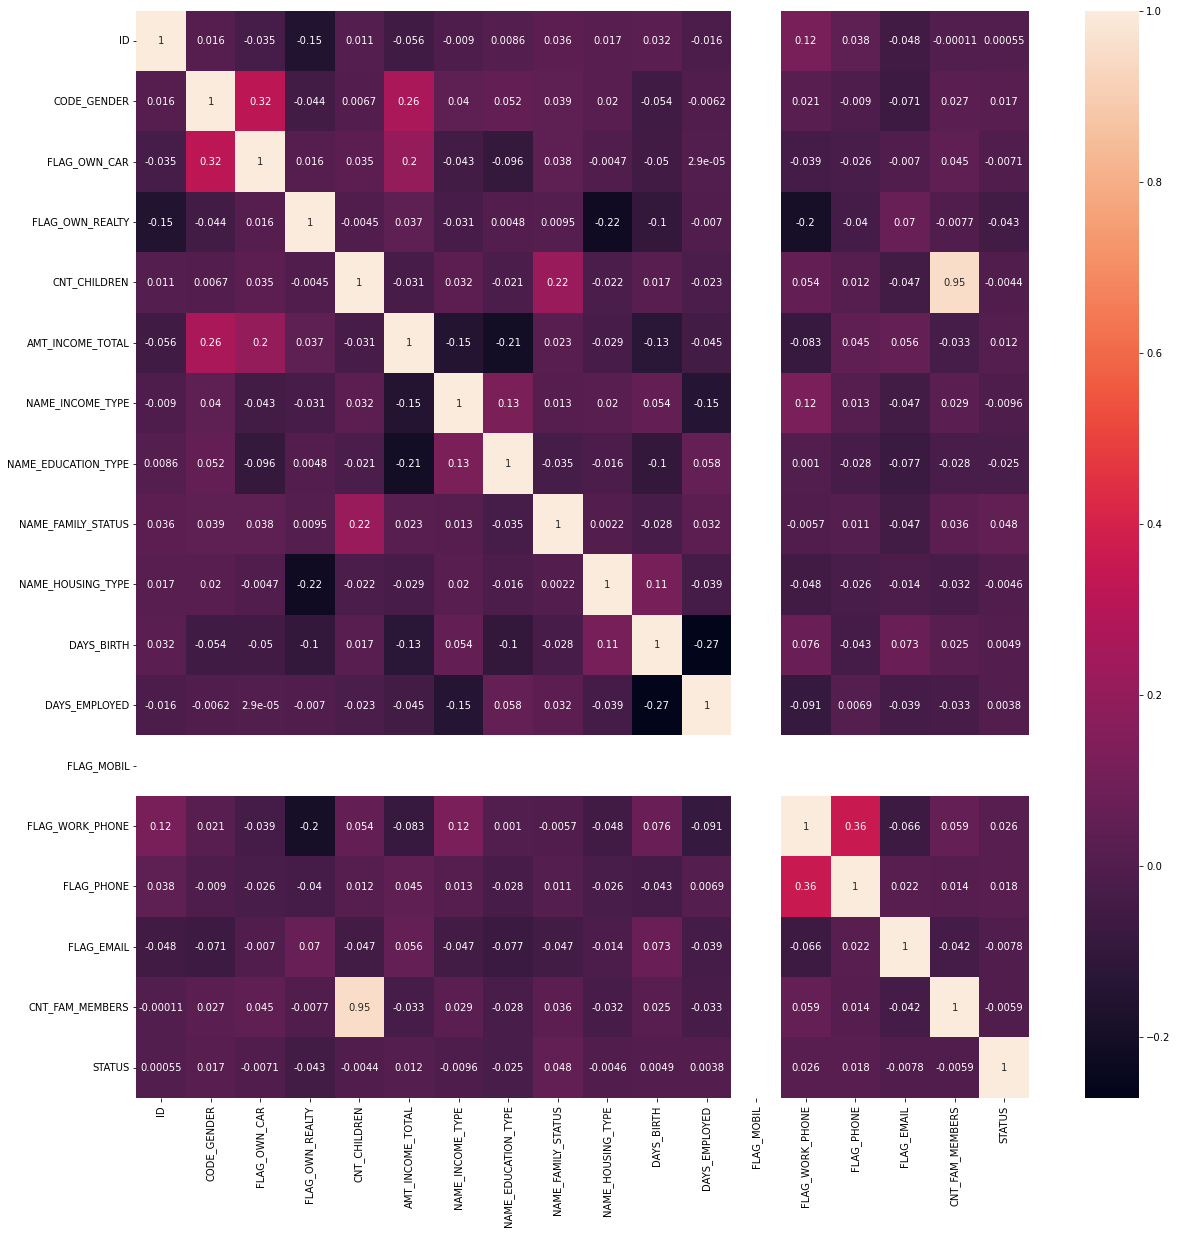

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

# Modelling

In [57]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [61]:
y_train.value_counts()

0    6555
1     106
Name: STATUS, dtype: int64

In [62]:
y_balanced.value_counts()

0    6555
1    6555
Name: STATUS, dtype: int64

In [63]:
y_test.value_counts()

0    2810
1      45
Name: STATUS, dtype: int64

In [64]:
y_test_balanced.value_counts()

0    2810
1    2810
Name: STATUS, dtype: int64

In [59]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

In [60]:
# Using SMOTE to address the oversampling of data
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

Since the oversampling issue is solved, we can implement some models on the data to see which one fits the best.

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [78]:
classifiers ={
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "NaiveBayes" : GaussianNB(),
    "RandomForest" : RandomForestClassifier(),
    "GradientBoost" : GradientBoostingClassifier(),
    "XGBoost" : XGBClassifier()
}

In [79]:
train_scores =[]
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_score = classifier.score(X_balanced, y_balanced)
    train_scores.append(train_score)
    test_score = classifier.score(X_test_balanced, y_test_balanced)
    test_scores.append(test_score)
    
print(train_scores)
print(test_scores)

[0.6181540808543097, 0.9850495804729215, 0.9393592677345538, 0.9946605644546148, 0.5562166285278414, 0.9946605644546148, 0.9620137299771166, 0.9943554538520214]
[0.5215302491103203, 0.7688612099644128, 0.8266903914590747, 0.8686832740213523, 0.5722419928825623, 0.8466192170818505, 0.9124555160142349, 0.9599644128113879]


We found that Random Forest, Gradient Boost, and XGBoost models perform the best on our data. Thus, we'll use these three models to predict our values.

In [87]:
xg = XGBClassifier()
model = xg.fit(X_balanced, y_balanced)
pred = xg.predict(X_test_balanced)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced, pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2810
           1       0.99      0.93      0.96      2810

    accuracy                           0.96      5620
   macro avg       0.96      0.96      0.96      5620
weighted avg       0.96      0.96      0.96      5620



In [89]:
gb = GradientBoostingClassifier()
model = gb.fit(X_balanced, y_balanced)
pred = gb.predict(X_test_balanced)

In [90]:
print(classification_report(y_test_balanced, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2810
           1       0.97      0.85      0.91      2810

    accuracy                           0.91      5620
   macro avg       0.92      0.91      0.91      5620
weighted avg       0.92      0.91      0.91      5620



In [91]:
rf = RandomForestClassifier()
model = rf.fit(X_balanced, y_balanced)
pred = rf.predict(X_test_balanced)

In [92]:
print(classification_report(y_test_balanced, pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2810
           1       0.99      0.76      0.86      2810

    accuracy                           0.88      5620
   macro avg       0.90      0.88      0.87      5620
weighted avg       0.90      0.88      0.87      5620

